In [1]:
#kaggle link: https://www.kaggle.com/code/gokceayci/energy-efficiency
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [28]:
df.shape

(768, 10)

In [29]:
df.isnull().values.any()

False

In [30]:
df.eq(0).sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7    48
X8    48
Y1     0
Y2     0
dtype: int64

In [31]:
df = df.rename(columns = { 'X1': 'Relative_Compactness',
                           'X2': 'Surface_Area',
                           'X3': 'Wall_Area',
                           'X4': 'Roof_Area',
                           'X5': 'Overall_Height',
                           'X6': 'Orientation',
                           'X7': 'Glazing_Area',
                           'X8': 'Glazing_Area_Distribution',
                           'Y1': 'Heating_Load',
                           'Y2': 'Cooling_Load'})

In [32]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


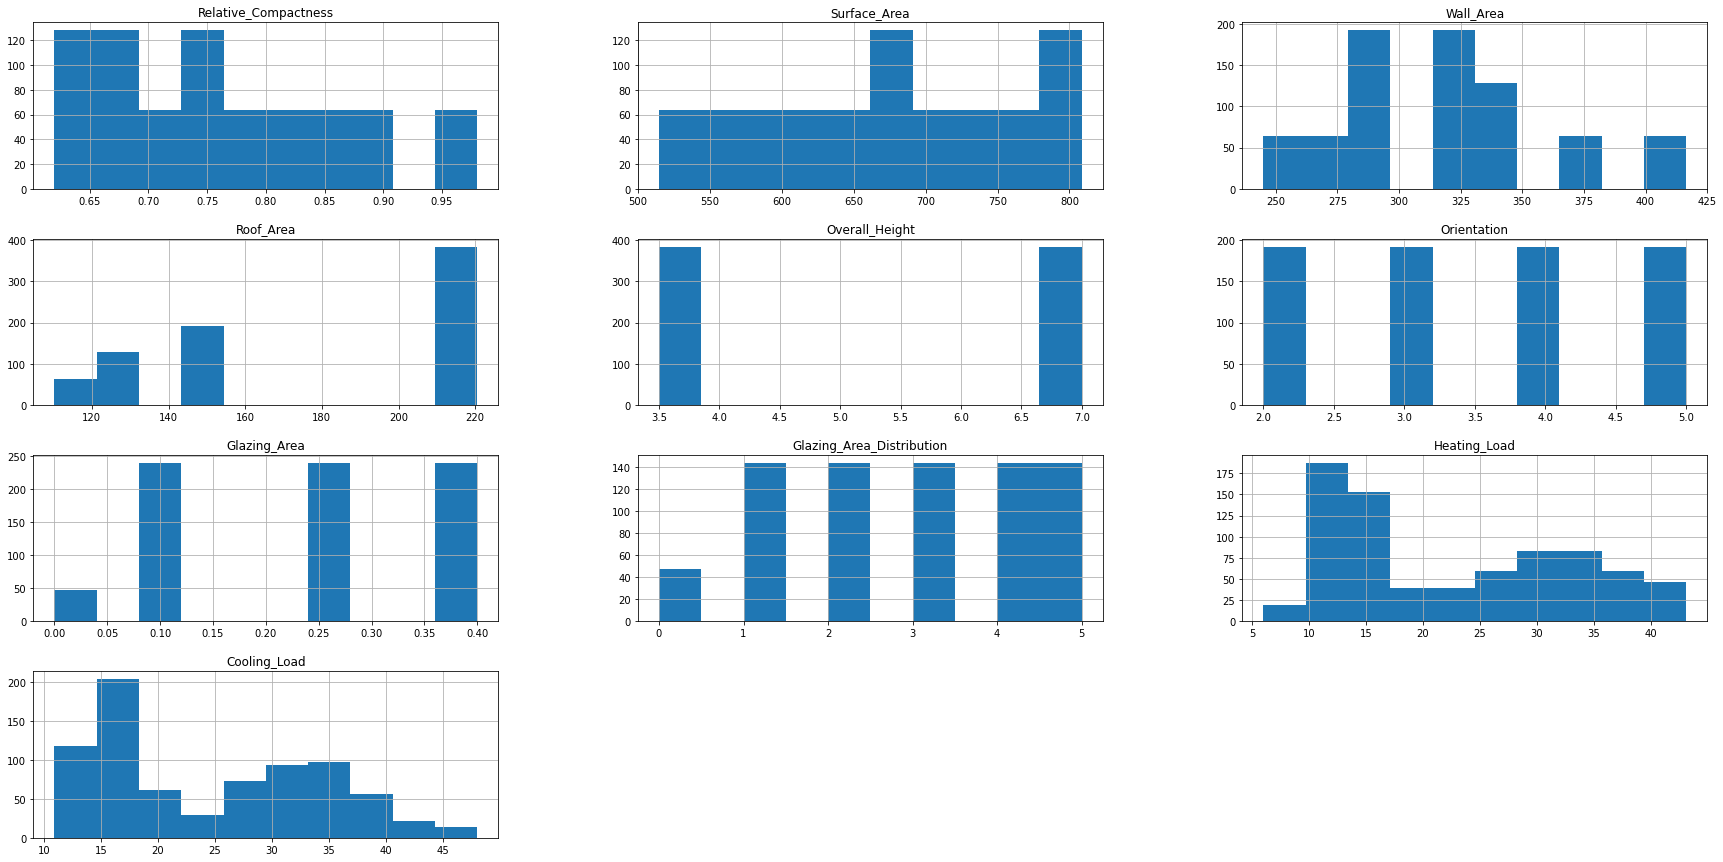

In [34]:
# Histogram
df.hist(figsize = (30,15))
plt.show()

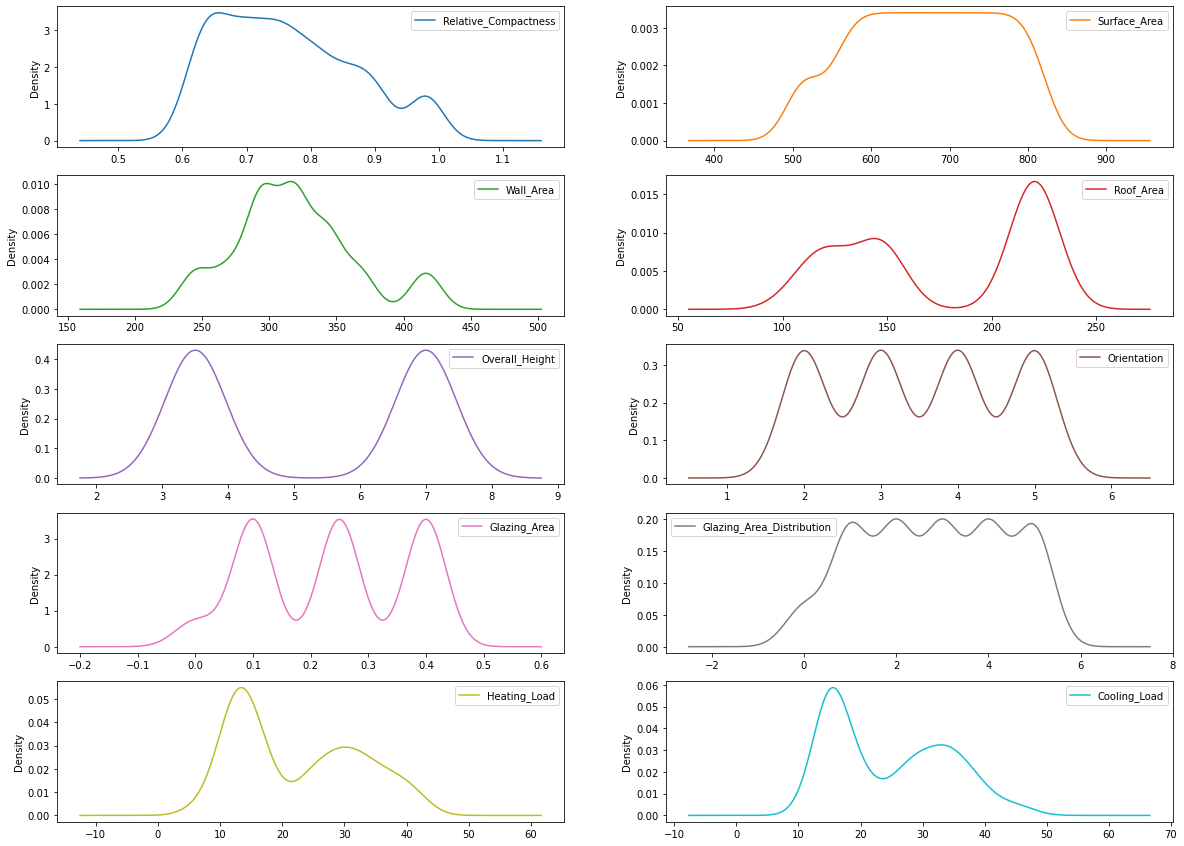

In [35]:
df.plot(kind='density', subplots=True, layout=(5,2), figsize=(20, 15), sharex=False)
plt.show()

<Figure size 1800x1080 with 0 Axes>

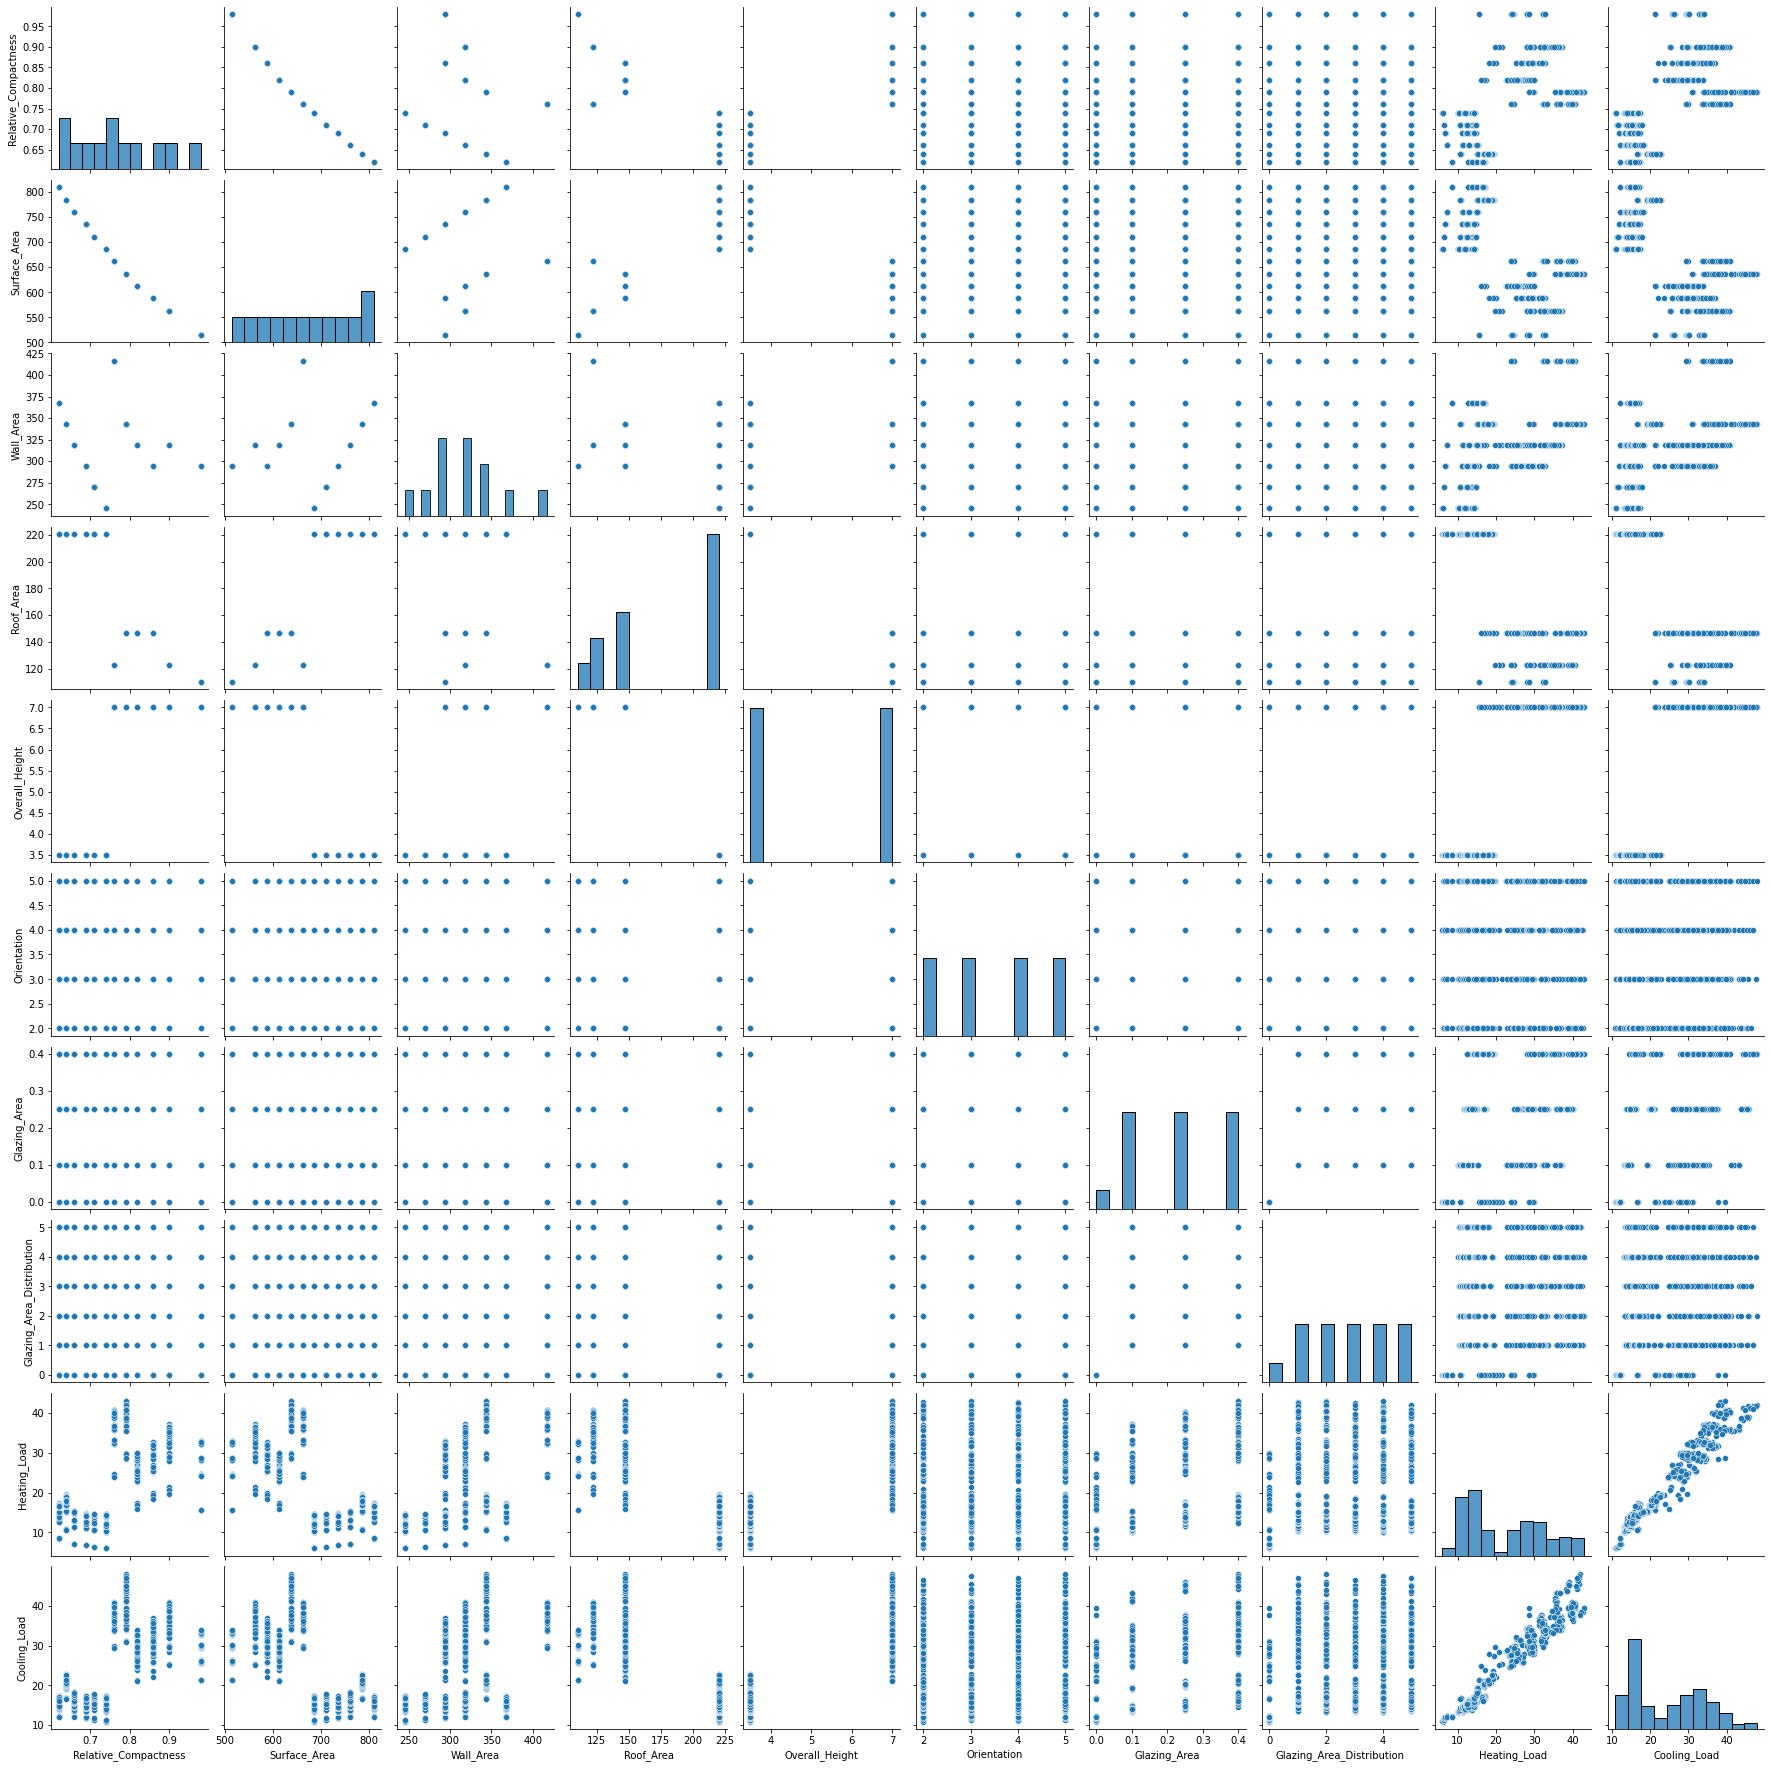

In [36]:
plt.figure(figsize = (25,15))
sns.pairplot(df)
plt.show()

In [37]:
df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


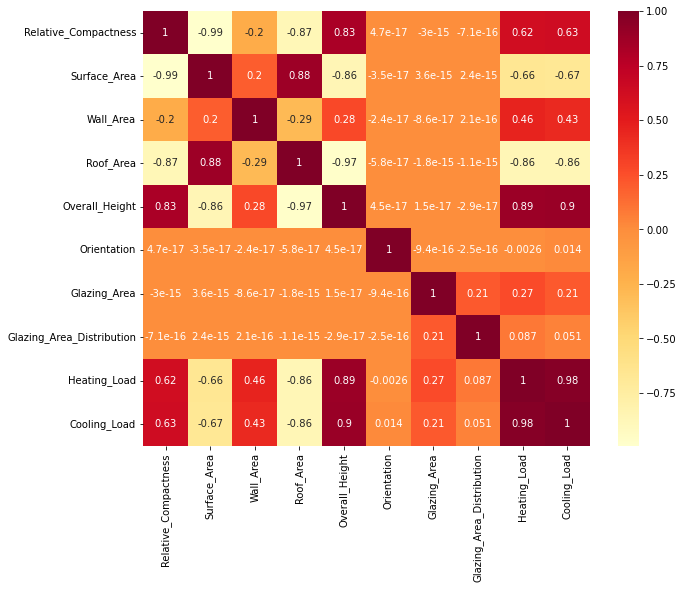

In [38]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.show()

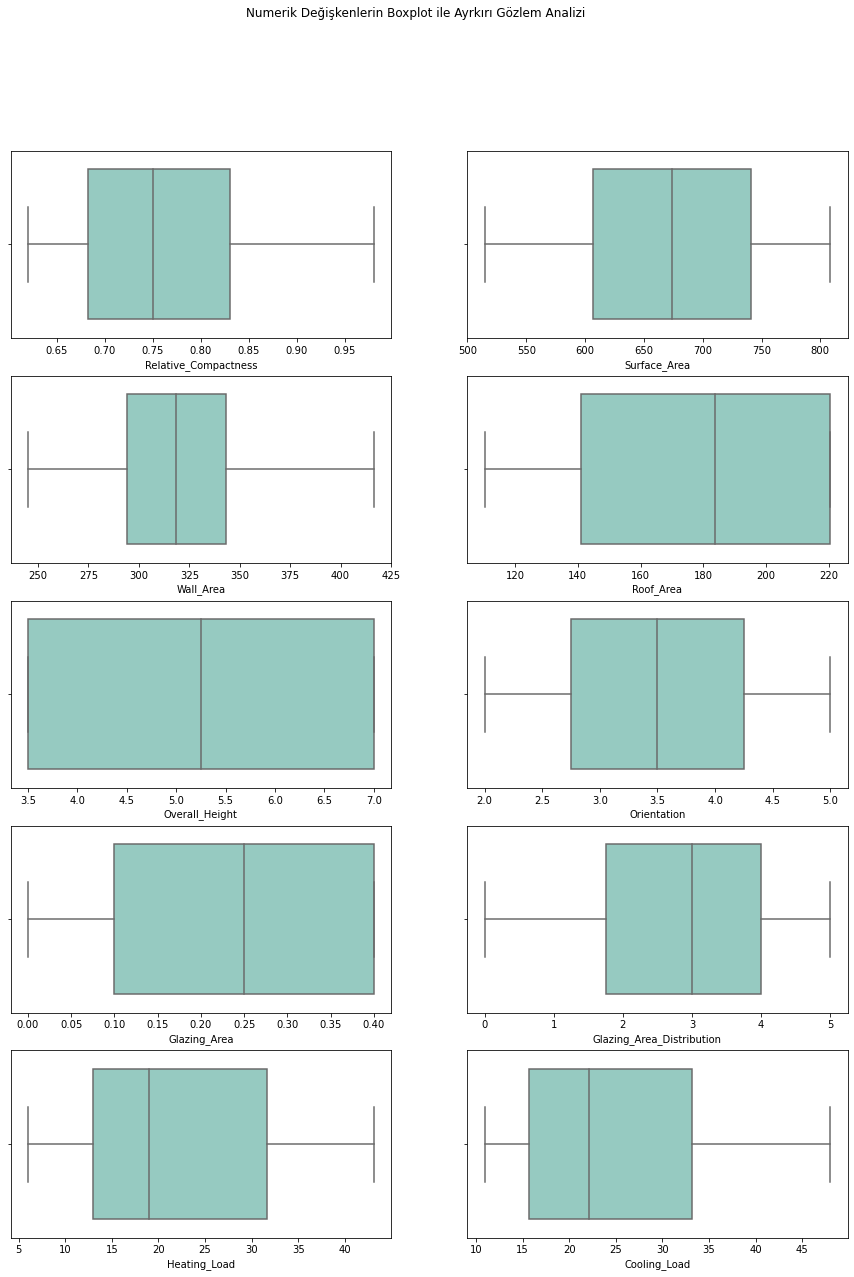

In [39]:
fig, axes = plt.subplots( figsize=(15, 20))
fig.suptitle('Numerik Değişkenlerin Boxplot ile Ayrkırı Gözlem Analizi')

plt.subplot(5,2,1)
sns.boxplot(x=df["Relative_Compactness"],palette='Set3')

plt.subplot(5,2,2)
sns.boxplot(x=df["Surface_Area"],palette='Set3')

plt.subplot(5,2,3)
sns.boxplot(x=df["Wall_Area"],palette='Set3')

plt.subplot(5,2,4)
sns.boxplot(x=df["Roof_Area"],palette='Set3')

plt.subplot(5,2,5)
sns.boxplot(x=df["Overall_Height"],palette='Set3')

plt.subplot(5,2,6)
sns.boxplot(x=df["Orientation"],palette='Set3')

plt.subplot(5,2,7)
sns.boxplot(x=df["Glazing_Area"],palette='Set3')

plt.subplot(5,2,8)
sns.boxplot(x=df["Glazing_Area_Distribution"],palette='Set3')

plt.subplot(5,2,9)
sns.boxplot(x=df["Heating_Load"],palette='Set3')

plt.subplot(5,2,10)
sns.boxplot(x=df["Cooling_Load"],palette='Set3')

plt.show()

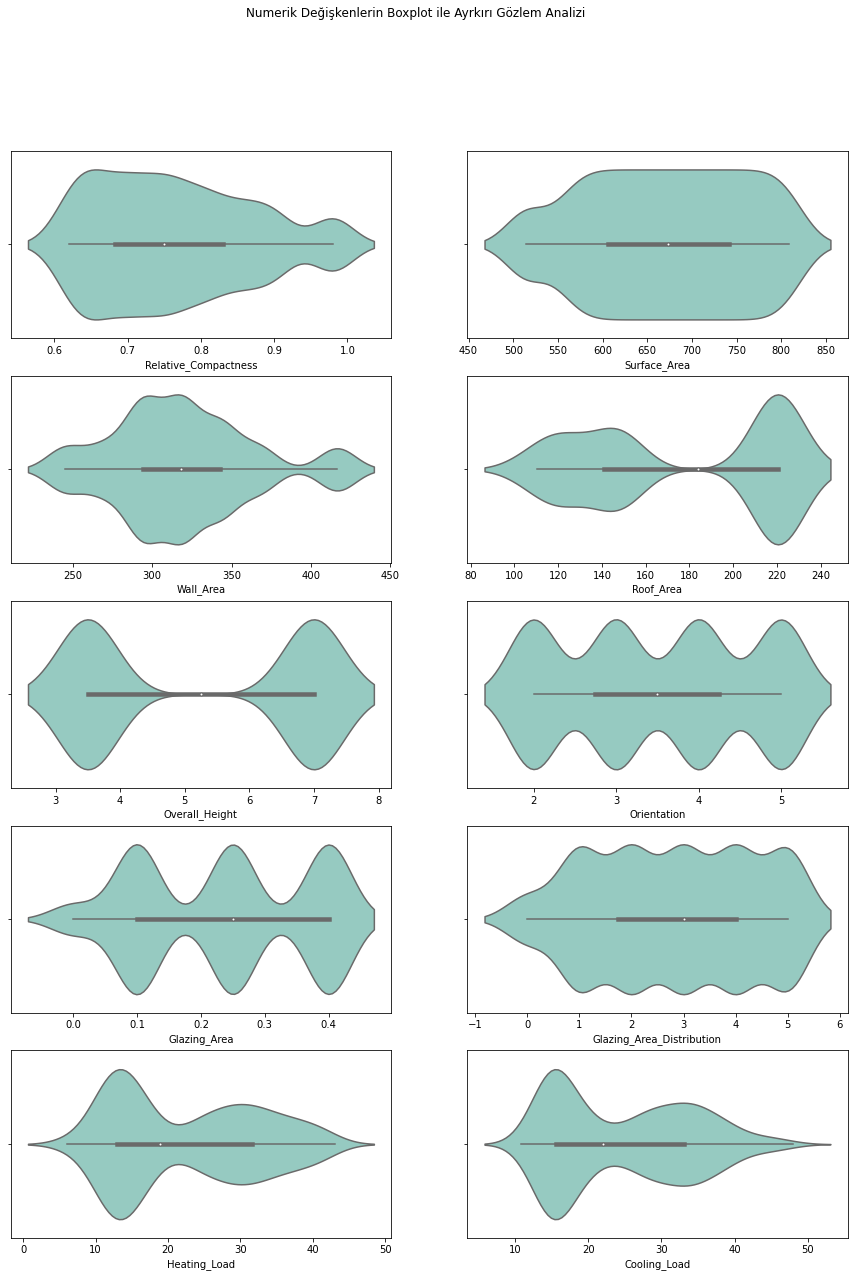

In [40]:
fig, axes = plt.subplots( figsize=(15, 20))
fig.suptitle('Numerik Değişkenlerin Boxplot ile Ayrkırı Gözlem Analizi')

plt.subplot(5,2,1)
sns.violinplot(x=df["Relative_Compactness"],palette='Set3')

plt.subplot(5,2,2)
sns.violinplot(x=df["Surface_Area"],palette='Set3')

plt.subplot(5,2,3)
sns.violinplot(x=df["Wall_Area"],palette='Set3')

plt.subplot(5,2,4)
sns.violinplot(x=df["Roof_Area"],palette='Set3')

plt.subplot(5,2,5)
sns.violinplot(x=df["Overall_Height"],palette='Set3')

plt.subplot(5,2,6)
sns.violinplot(x=df["Orientation"],palette='Set3')

plt.subplot(5,2,7)
sns.violinplot(x=df["Glazing_Area"],palette='Set3')

plt.subplot(5,2,8)
sns.violinplot(x=df["Glazing_Area_Distribution"],palette='Set3')

plt.subplot(5,2,9)
sns.violinplot(x=df["Heating_Load"],palette='Set3')

plt.subplot(5,2,10)
sns.violinplot(x=df["Cooling_Load"],palette='Set3')

plt.show()

In [41]:
df = (df-np.min(df)) / (np.max(df) - np.min(df))
df .head(5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.400463,0.293826,0.0,0.173611,0.361111,0.583333,1.0
Surface_Area,768.0,0.534722,0.299613,0.0,0.312500,0.541667,0.770833,1.0
Wall_Area,768.0,0.428571,0.254382,0.0,0.285714,0.428571,0.571429,1.0
Roof_Area,768.0,0.601852,0.409668,0.0,0.277778,0.666667,1.000000,1.0
Overall_Height,768.0,0.500000,0.500326,0.0,0.000000,0.500000,1.000000,1.0
Orientation,768.0,0.500000,0.372921,0.0,0.250000,0.500000,0.750000,1.0
Glazing_Area,768.0,0.585938,0.333051,0.0,0.250000,0.625000,1.000000,1.0
Glazing_Area_Distribution,768.0,0.562500,0.310192,0.0,0.350000,0.600000,0.800000,1.0
Heating_Load,768.0,0.439396,0.272046,0.0,0.188258,0.348881,0.691763,1.0
Cooling_Load,768.0,0.368644,0.256216,0.0,0.127121,0.301104,0.598775,1.0


In [43]:
# veri setini değişkenlere ayıralım.
X = df.drop(["Heating_Load","Cooling_Load"],axis=1)
y = df[["Heating_Load","Cooling_Load"]]

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state =42)

In [45]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [46]:
def score(m):
    m.fit(x_train,y_train)    
    print(m.score(x_train, y_train))

In [47]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
score(regression_model)

0.9026379224548287


In [48]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(random_state=42, n_jobs=-1)
randomForest.fit(x_train, y_train)
randomForest.score(x_train, y_train)

0.9968244412033225

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(random_state=42, n_jobs=-1)
randomForest.fit(x_train, y_train)
randomForest.score(x_train, y_train)

In [ ]:
from sklearn.ensemble import XGboostRegressor
randomForest = RandomForestRegressor(random_state=42, n_jobs=-1)
randomForest.fit(x_train, y_train)
randomForest.score(x_train, y_train)